In [5]:
%%cmd
pip install watermark

UsageError: Cell magic `%%cmd` not found.


In [6]:
%load_ext watermark

In [7]:
%watermark -d -v -m -p numpy,pandas,matplotlib,cipy,sklearn

2020-06-12 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
cipy not installed
sklearn 0.22.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-101-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 16
interpreter: 64bit


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [44]:
digits = load_digits()
X, y = digits.data, digits.target

In [45]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
Xtrain.shape

(1257, 64)

In [47]:
Ytrain.shape

(1257,)

In [48]:
gnb = GaussianNB().fit(Xtrain, Ytrain)
acc_score = gnb.score(Xtest, Ytest)

In [49]:
acc_score

0.8240740740740741

In [50]:
prob = gnb.predict(Xtest) # 返回预测的分类结果

In [51]:
prob

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 3, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 3, 1, 3, 6, 7, 9, 0, 0, 5, 8, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 2, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 8, 5, 8, 0, 7, 1, 7, 7,
       3, 4, 8, 9, 7, 7, 8, 1, 6, 5, 3, 5, 5, 4, 1, 7, 0, 6, 8, 5, 3, 3,
       1, 5, 9, 9, 5, 7, 5, 6, 8, 8, 6, 7, 6, 1, 5, 1, 7, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 3, 8, 6, 1, 0, 7, 1, 6,
       3, 3, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 1, 1, 4, 8, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 8, 3, 3, 1, 6, 9, 8, 6, 3, 1, 2, 0, 7, 6, 1, 1,
       8, 7, 3, 7, 1, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 3, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 1,
       7, 3, 8, 4, 6, 9, 4, 5, 7, 3, 4, 6, 2, 3, 0,

In [52]:
prob_ = gnb.predict_proba(Xtest) # 返回预测的概率

In [53]:
prob_.shape

(540, 10)

In [54]:
prob_[1,:].sum()

1.0

In [55]:
prob_.sum(axis=1).shape

(540,)

## 高斯朴素贝叶斯的拟合效果与运算速度

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime

In [22]:
def plot_learning_curve(estimator,title,X,y
                        , ax
                        , ylim = None
                        , cv=None
                        , n_jobs=None
                       ):
    train_sizes, train_scores, test_socres = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()# 显示网格
    # learning_curve返回的分数是对每个样本而言的，所以需要求均值代表整个模型的分数
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color='r'
            , label="Training score"
           )
    ax.plot(train_sizes, np.mean(test_socres, axis=1), 'o-'
            , color='g'
            , label="Test score"
           )
    ax.legend(loc="best")
    return ax

In [23]:
digits = load_digits()
X, y = digits.data, digits.target

In [24]:
X.shape

(1797, 64)

In [25]:
title = ["Naive Bayes", "Decision Tree", "SVM, RBF kernel", "Random Forest", "Logistic"]
model = [GaussianNB(), DTC(), SVC(gamma=0.001)
         , RFC(n_estimators=50)
         , LR(C=0.1, solver="lbfgs")
        ]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:01:122334
Decision Tree:00:00:986944
SVM, RBF kernel:00:07:584598
Random Forest:00:06:974330
Logistic:00:09:777686


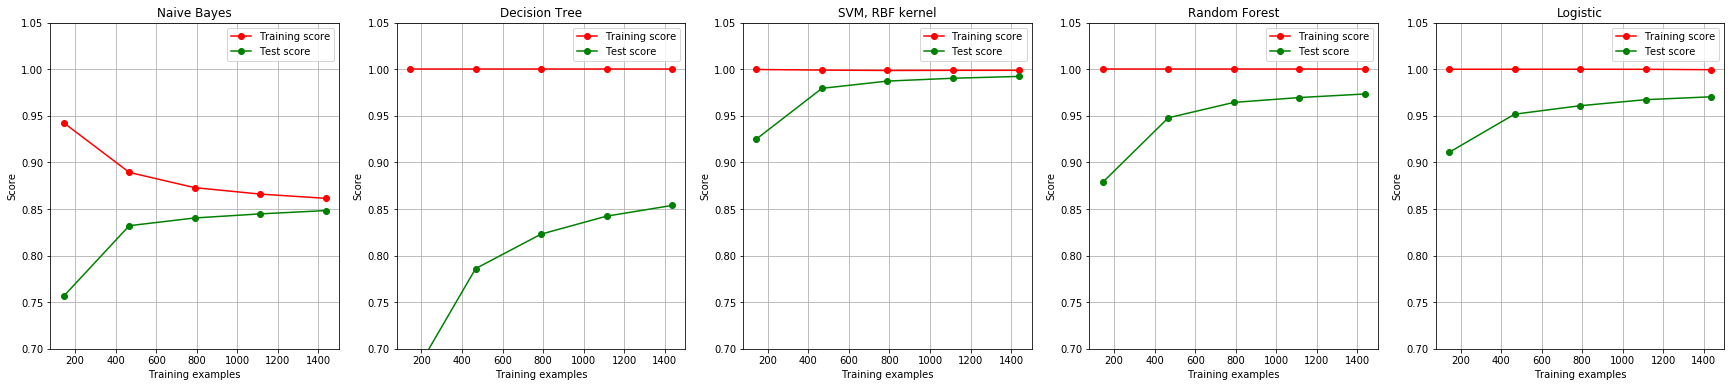

In [26]:
# 进入循环，绘制学习曲线
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind, title_, estimator in zip(range(len(title)), title, model):
    times = time()
    plot_learning_curve(estimator
                        , title_
                        , X
                        , y
                        , ax=axes[ind]
                        , ylim=[0.7, 1.05]
                        , n_jobs=4
                        , cv=cv
                       )
    print("{}:{}".format(title_, datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

In [27]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
from sklearn.metrics import brier_score_loss

In [56]:
brier_score_loss(Ytest, prob_[:,1], pos_label=1)

ValueError: Only binary classification is supported. Labels in y_true: [0 1 2 3 4 5 6 7 8 9].

In [57]:
from sklearn.metrics import log_loss

In [58]:
log_loss(Ytest, prob_)

3.0607259307941326

### 可靠性曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [2]:
X, y = mc(n_samples=100000, n_features=20
          ,n_classes=2
          ,n_informative=2
          ,n_redundant=10
          ,random_state=0
         )

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.99, random_state=0)

In [65]:
gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:,1]

In [66]:
from sklearn.calibration import calibration_curve

In [67]:
trueproba, predproba = calibration_curve(Ytest, prob_pos, n_bins=10)

In [71]:
clf_score = brier_score_loss(Ytest, prob_pos)

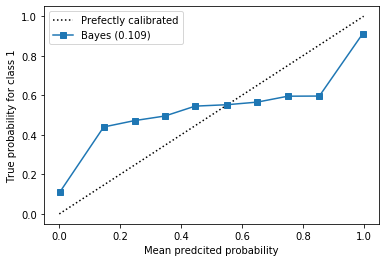

In [72]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0,1],[0,1],"k:",label="Prefectly calibrated")
ax1.plot(predproba, trueproba, "s-", label="%s (%1.3f)"%("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
plt.legend()
plt.show()

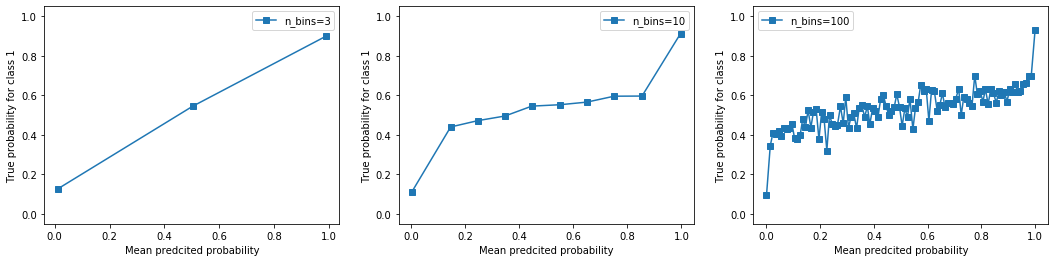

In [74]:
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind, i in enumerate([3,10,100]):
    ax = axes[ind]
    ax1.plot([0,1],[0,1],"k:",label="Prefectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos, n_bins=i)
    ax.plot(predproba, trueproba, "s-", label="n_bins={}".format(i))
    ax.set_ylabel("True probability for class 1")
    ax.set_xlabel("Mean predcited probability")
    ax.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

### 尝试验证更多模型

In [6]:
name = ["GaussianBayes", "Logistic","SVC"]
gnb = GaussianNB()
logi = LR(C=1,solver="lbfgs",max_iter=3000, multi_class="auto")
svc = SVC(kernel="linear", gamma=1)

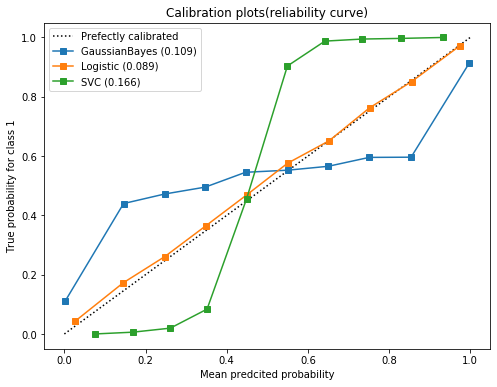

In [78]:
fig,ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0,1],[0,1],"k:",label="Prefectly calibrated")
for clf, name_ in zip([gnb,logi,svc], name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max()-prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    trueprob, predprob = calibration_curve(Ytest, prob_pos, n_bins=10)
    ax1.plot(predprob, trueprob, "s-", label="%s (%1.3f)"%(name_, clf_score))

ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.set_title("Calibration plots(reliability curve)")
ax1.legend()
plt.show()

### 预测概率的直方图

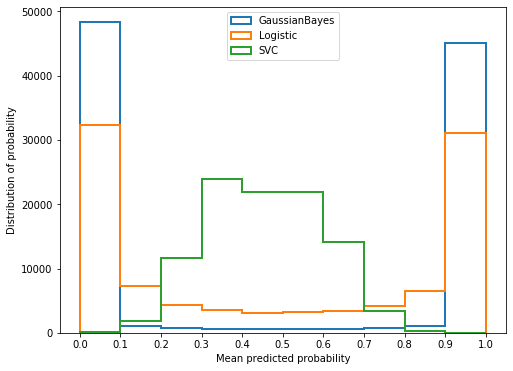

In [7]:
fig, ax2 = plt.subplots(figsize=(8,6))

for clf, name_ in zip([gnb,logi,svc], name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max()-prob_pos.min())
    
    ax2.hist(prob_pos
             ,bins=10
             ,label=name_
             ,histtype="step"
             ,lw=2
            )
ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05,1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()